# Easy Way of Finding and Visualizing Missing Data in Python

explore and visualize the incompleteness of a dataset in Python with missingno library.

***

### Complete blog at [Medium](https://medium.datadriveninvestor.com/easy-way-of-finding-and-visualizing-missing-data-in-python-bf5e3f622dc5).

***


# Missing Data Basics

As a data science disciple, I need to work more with data, conducting EDA, designing, and developing the model out of it. Data is nothing until you understand it and visualize it most effectively. During the process of exploring and expressing the data, we regularly come across having missing values in the dataset. Many missing values or null values are frequently seen in real-world's datasets. Missing data tends to introduce bias that leads to misleading results so they cannot be ignored. The reason behind missing values can be a variety of factors, including a lack of data, data loss throughout the procedure, and so on.

Missing Value treatment becomes important since the data insights or the performance of your work/model could be impacted if the missing values are not appropriately handled. Thus, we need to understand the way of finding the missing values and treating them before processing them further.


<div class="alert alert-block alert-info">
&#8265; <b>Why focus on missing values:</b> Missing data tends to introduce bias that leads to misleading results.
</div>





#### Dataset: [Palmer Penguins](https://github.com/allisonhorst/palmerpenguins)

The data was collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [Palmer Station, Antarctica, LTER.](https://pal.lternet.edu) 

Dataset contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

__[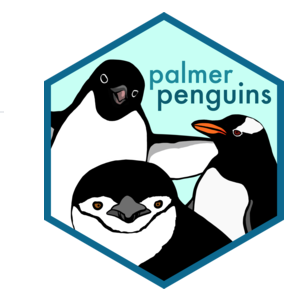](https://github.com/allisonhorst/palmerpenguins)__

## Visualization based on the same dataset
Click on image to view the interactive visualization.

__[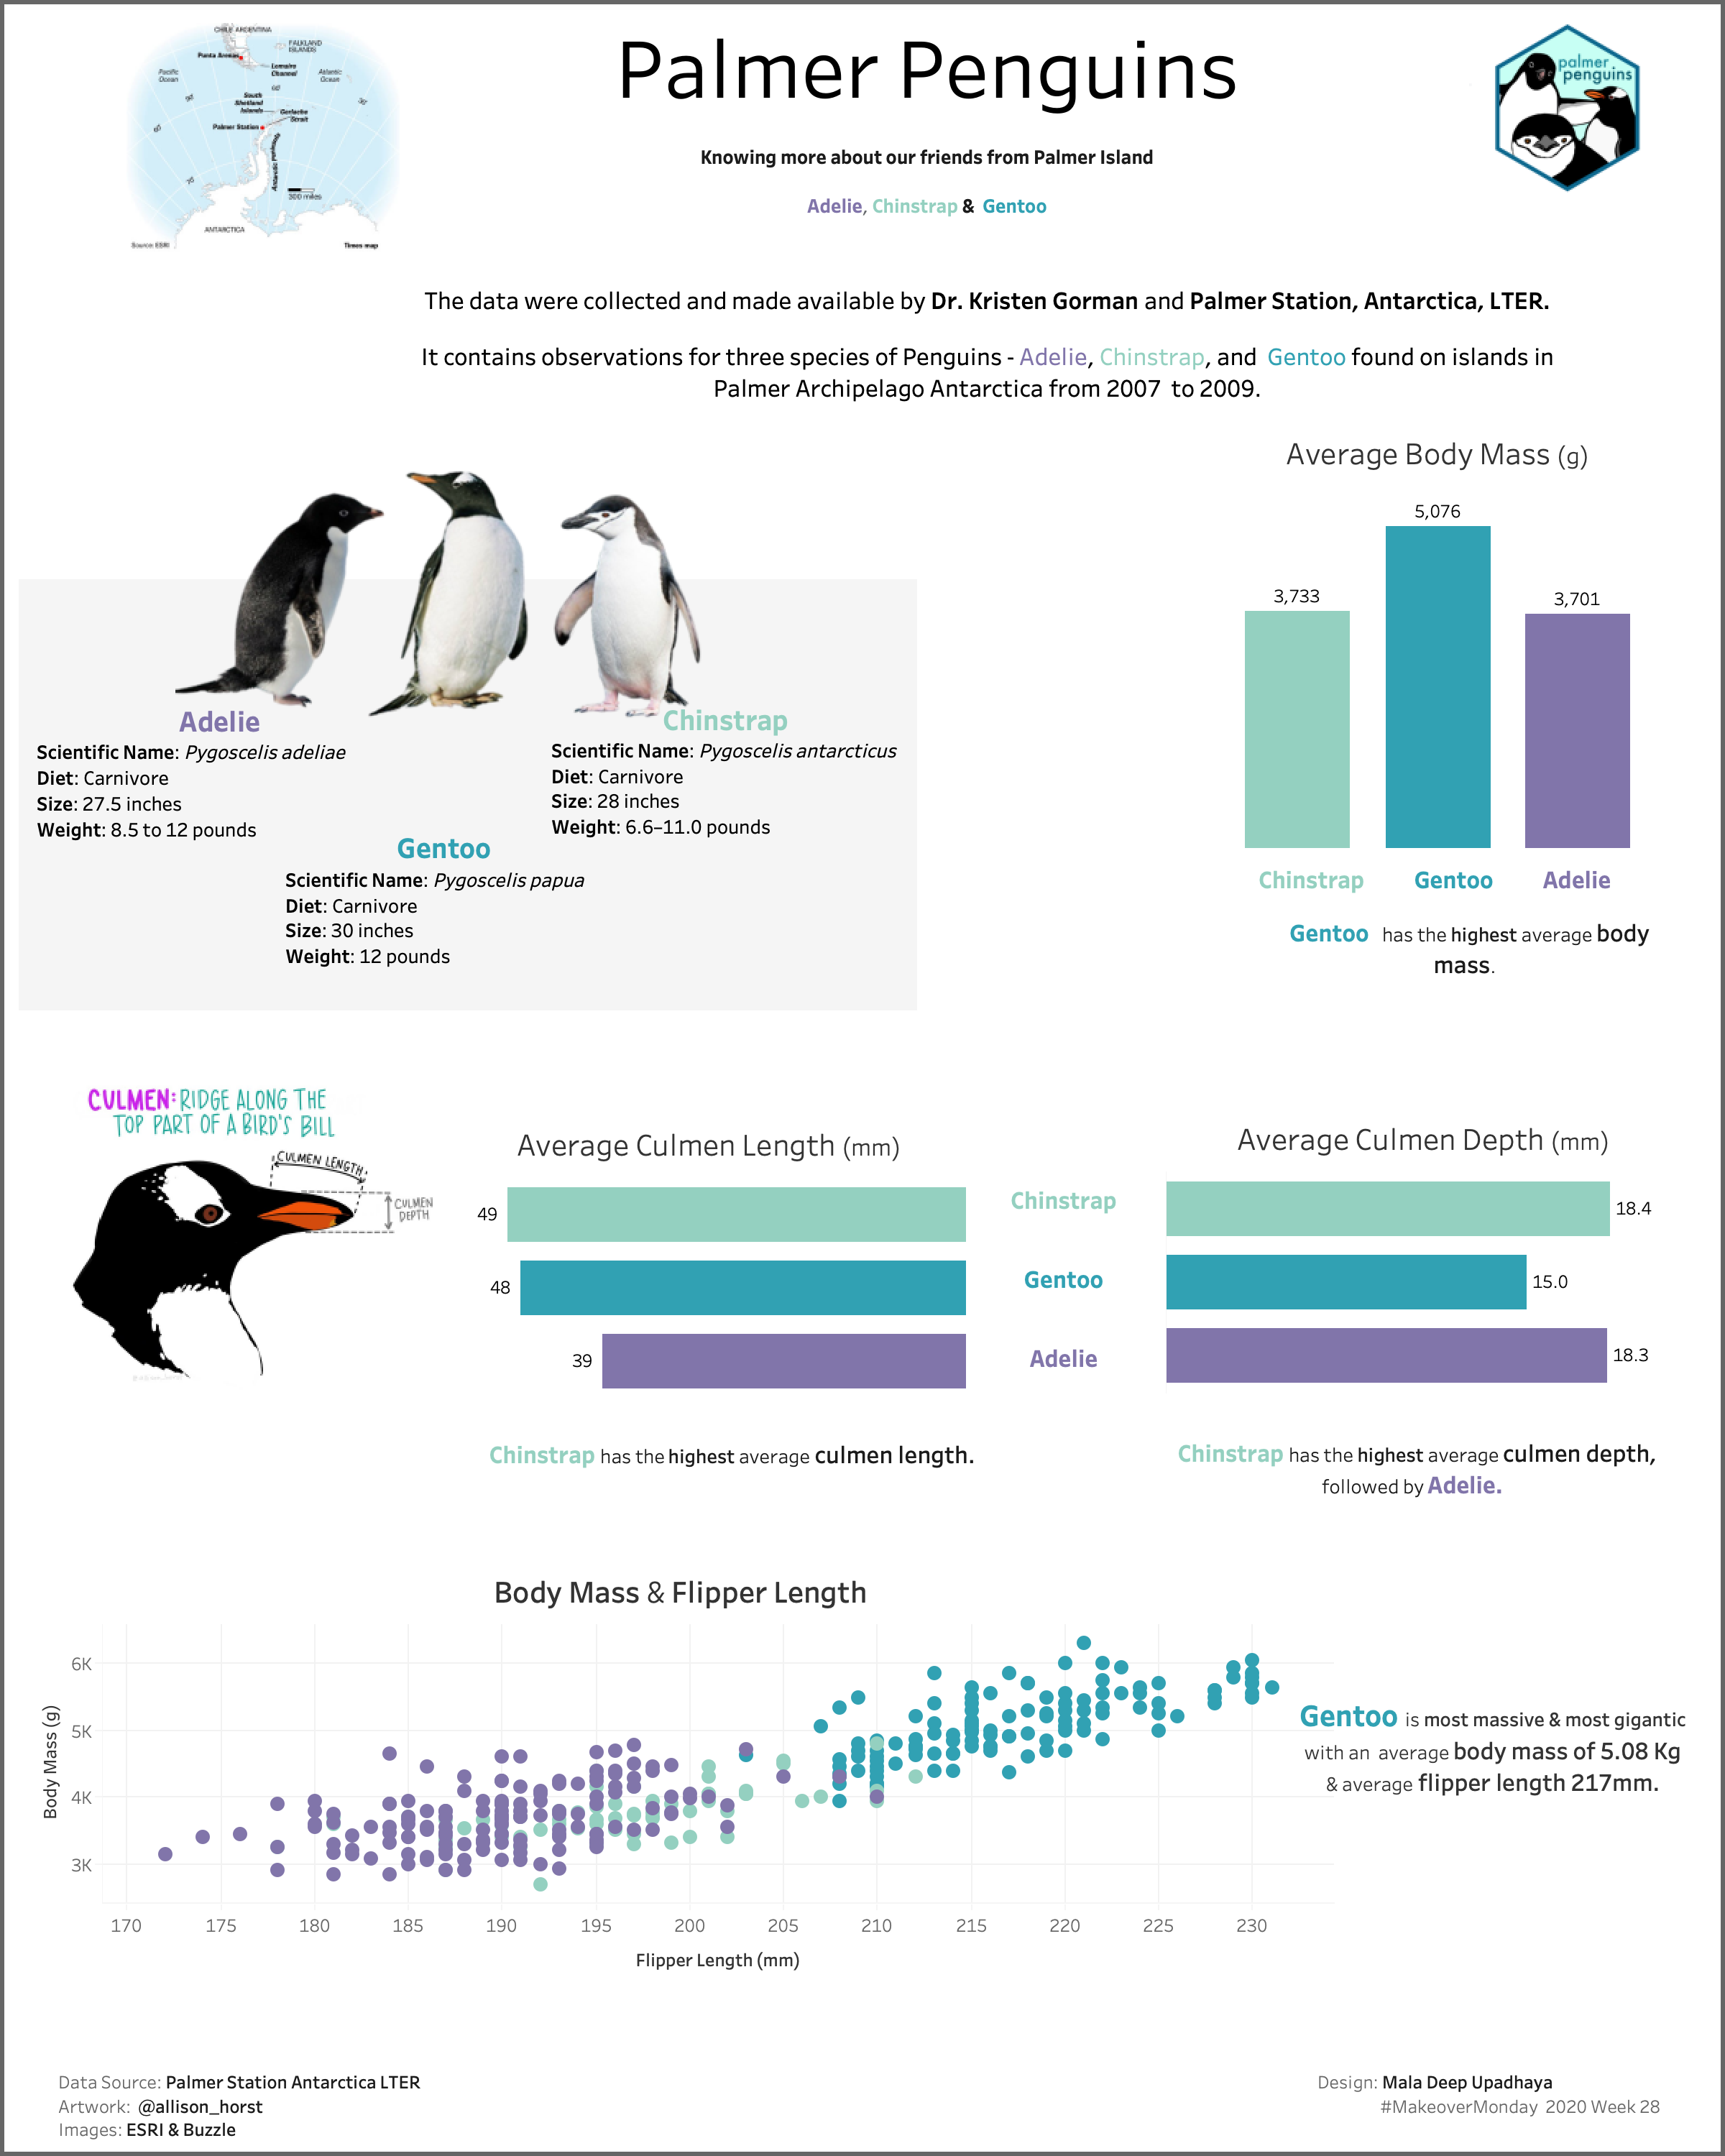](https://public.tableau.com/app/profile/maladeep/viz/Penguin_15948704770880/PalmerPenguins)__

***

# TOC
###### Click each heading to jump to the section


### 1.  [Data loading and exploring](#Data-loading-and-exploring)

### 2. [No missingno way](#No-missingno-way)

###  3. [Checking and working with missing value with wonderful missingno library](#Checking-and-working-with-missing-value-with-wonderful-missingno-library)

### 4. [Bar chart](#Bar-chart)
It displays a count of values present per columns ignoring missing values.

### 5. [Correlation heatmap](#Correlation-heatmap)
Corelation heatmap measures nullity correlation between columns of the dataset i.e., how strongly the presence or absence of one variable affects the presence of another.


### 6. [Matrix](#Matrix)
It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

### 7. [Dendrogram](#Dendrogram)
The dendrogram like heatmap groups columns based on nullity relation between them, revealing trends deeper than in the correlation heatmap. It groups columns together where there is more nullity relation.

<div class="alert alert-block alert-info">
<b>After understanding and working with this notebook, you will be able to do:</b> 
    <li> Explore the ways of checking missing values. </li>
<li> Visualize the missing values with bar chart, matrix, heatmap and dendrogram. </li>
</div>


***

# Importing libraries

In [ ]:

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno # Our hero ^_^


# Data loading and exploring

In [ ]:
# Loading dataset

transaction_df = pd.read_csv('../input/palmer-penguine/Penguindata.csv')

In [ ]:
# Viewing data

transaction_df.head()


# No missingno way 

We will explore and understand the missing or null values of our dataset based on various snippet.

In [ ]:
# Checking first 5 data to see any missing values

transaction_df.head(5)


In [ ]:
# Checking random 10 data to see any missing values

transaction_df.sample(10)

In [ ]:
#  check if there  is any missing values in dataframe as a whole

transaction_df.isnull()

In [ ]:
# Check is there any missing values across each column

transaction_df.isnull().any()

Here from *Culmen Length (mm),* we see True, which indicates that we have some missing values.

In [ ]:
# Next way: Print the columns with missing values

[col for col in transaction_df.columns if transaction_df[col].isnull().any()]

In [ ]:
# Count of missing values of each column

transaction_df.isna().sum()

In [ ]:
# Count missing values in the dataset

print(transaction_df.isnull().values.sum())


In [ ]:
### get count of missing values of a particular column by group i.e., count of missing values of “Culmen Length (mm)” column by group (“Species”)

transaction_df.groupby(['Species'])['Culmen Length (mm)'].apply(lambda x: x.isnull().sum())

***

So, till now we did wrote long and little tedious code, now we will harness the power of wonderful missingno library.

# Checking and working with missing value with wonderful missingno library




**Brief Intro:** The Missingno is the Python library compatible with pandas and has a really excellent visualization of the distribution of NaN values. This library is built on matplotlib thus any graphs it produces will be static. 
 



<div class="alert alert-block alert-success">
<b><a href="https://libraries.io/pypi/missingno" target=_blank> Click to read more about missingno library. </a></b> 
   
</div>


Using Missingno library, we can depict missing values in many ways. here we will be generating:
* Bar Chart
* Heatmap
* Matrix
* Dendrogram


## Bar chart

Bar chart displays a count of values present per columns ignoring missing values.

In [ ]:
msno.bar(transaction_df)

Here, we see that in each column we need to have 344 data,  but in columns *Culmen Length (mm), Culmen Depth (mm),
 Flipper Length (mm),
 Body Mass (g),
 Sex,
 Delta 15 N (o/oo),
 Delta 13 C (o/oo),
 Comments*, we have some missing values.
 


<div class="alert alert-block alert-warning">
   &#9755; <b>Double Check: </b> Inspecting missing values using <b> isnull() </b> and <b>missingno</b> function gave the same result.
</div>



***

# Correlation heatmap


Correlation heatmap measures nullity correlation between columns of the dataset i.e., how strongly the presence or absence of one variable affects the presence of another.


<div class="alert alert-block alert-success">
 &#9755; <b><a href="https://medium.com/analytics-vidhya/exploratory-data-analysis-for-beginner-7488d587f1ec" target=_blank> How to interpret correlation Heatmap</a></b> 
    
    
&#9755; <b><a href="https://medium.com/analytics-vidhya/correlation-causation-977f71bb1e36" target=_blank> Understanding correlation and causation</a></b> 
 
   
</div>

In [ ]:
msno.heatmap(transaction_df, cmap='YlGnBu')


**Nullity correlation ranges from(-1 to 1):**

* if one variable appears the other definitely does not: -1 (AKA: strong negative correlation, or a yellow color)
* variables appearing or not appearing have no effect on one another: 0 
* if one variable appears the other definitely also does:  1 (AKA: strong positive correlation, or a blue color)

Variables that are always full or always empty have no meaningful correlation, thus the are  removed from the visualization.


One thing to notice is that values marked <1 or >-1 have a correlation that is almost exactingly negative or positive, but is still not quite good. 

We can see that there is a low nullity correlation between *Comments* with *Sex* and *Culmen Length (mm),* whereas *Delta 15 N (o/oo)* and *Delta 13 C (o/oo)* are both <1, indicating that, contrary to our expectations, there are a few records which have one and not the other, and such cases require attention.


> The heatmap is helpful for identifying data completeness correlations between variable pairs, but it has the limited explanatory ability for broader relationships and no special support for really big datasets.




***
## Matrix

It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.


In [ ]:
msno.matrix(transaction_df)

Sex, Delta 15 N (o/oo), Delta 13 C (o/oo), are completed but uneven, so we say it has null values. In *Comments,* we see very little black lines and more white, thus we see it has many null values.

The sparkline (or in some cases striped line) to the right illustrates the overall shape of the data completeness and highlights the rows in the dataset with the **highest of 19 and lowest nullity of 12.**

Lower left corner values give the overall row/data (344) of the dataset.


> Matrix supports up to 50 labeled columns while when working with a large number of columns, we can use dendrogram as it simply flips them to a horizontal configuration.

***

# Dendrogram


The dendrogram like heatmap groups columns based on nullity relation between them, revealing trends deeper than in the correlation heatmap. It groups columns  where there is more nullity relation.

In [ ]:
msno.dendrogram(transaction_df)

The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance). 

<div class="alert alert-block alert-success">
 &#9755; <b><a href="http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html" target=_blank>  More about Hierarchical Clustering Algorithm.</a></b> 
    
</div>

We interpret the graph based on a top-down approach. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. 

Here, the dendrogram put together the variables which are required and therefore present in every record. Here we see that *Delta 15 N (o/oo)* and *Delta 13 C (o/oo)* are grouped which are further grouped with *Sex* and rest from *Date Egg* to *Sample Number* and so on are highly related to each other in matters of nullity.



> Connections farther from zero represent combinations of variables that are less similar in nullity.



***

Thus, if you made it this far, We can see that with the missingno library we can easily explore and visualizing missing data. From displaying a count of values present per column, measuring nullity correlation between columns of the dataset, exploring the distribution of data across all columns in the whole dataset, and grouping columns together in place of higher nullity relation is made easy.

***

Closing with Daniel Keys Moran quote:
>> You can have data without information, but you cannot have information without data.



<div class="alert alert-block alert-warning">
 &#9755; <b><a href="https://www.datacamp.com?tap_a=5644-dce66f&tap_s=1794269-f38532&utm_medium=affiliate&utm_source=maladeepupadhaya" target=_blank>  Learn more about data handling and visualization in Datacamp.</a></b> 
    
</div>

# Extra Readings & Tutorials 🔖

1. [Exploratory Data Analysis for Beginner Using Python with Complete Guide and  Code
](https://medium.com/analytics-vidhya/exploratory-data-analysis-for-beginner-7488d587f1ec)

2. [Build Your First Data Visualization Web App in Python Using Streamlit](https://towardsdatascience.com/build-your-first-data-visualization-web-app-in-python-using-streamlit-37e4c83a85db)

3. [The Ultimate Guide To SMS: Spam or Ham Detector Using Python(AN APPROACH WITH ARTIFICIAL INTELLIGENCE)](https://towardsdatascience.com/the-ultimate-guide-to-sms-spam-or-ham-detector-aec467aecd85)

4. [Interactive Tools to Explore Palmer Penguins Dataset](https://explore-palmer-penguins.herokuapp.com)

5. [Surprisingly Effective Way To Name Matching In Python: Data Matching, Fuzzy Matching, Data Deduplication](https://towardsdatascience.com/surprisingly-effective-way-to-name-matching-in-python-1a67328e670e)



### Click the medium logo to check my other articles that might help you excel in your data science career.


__[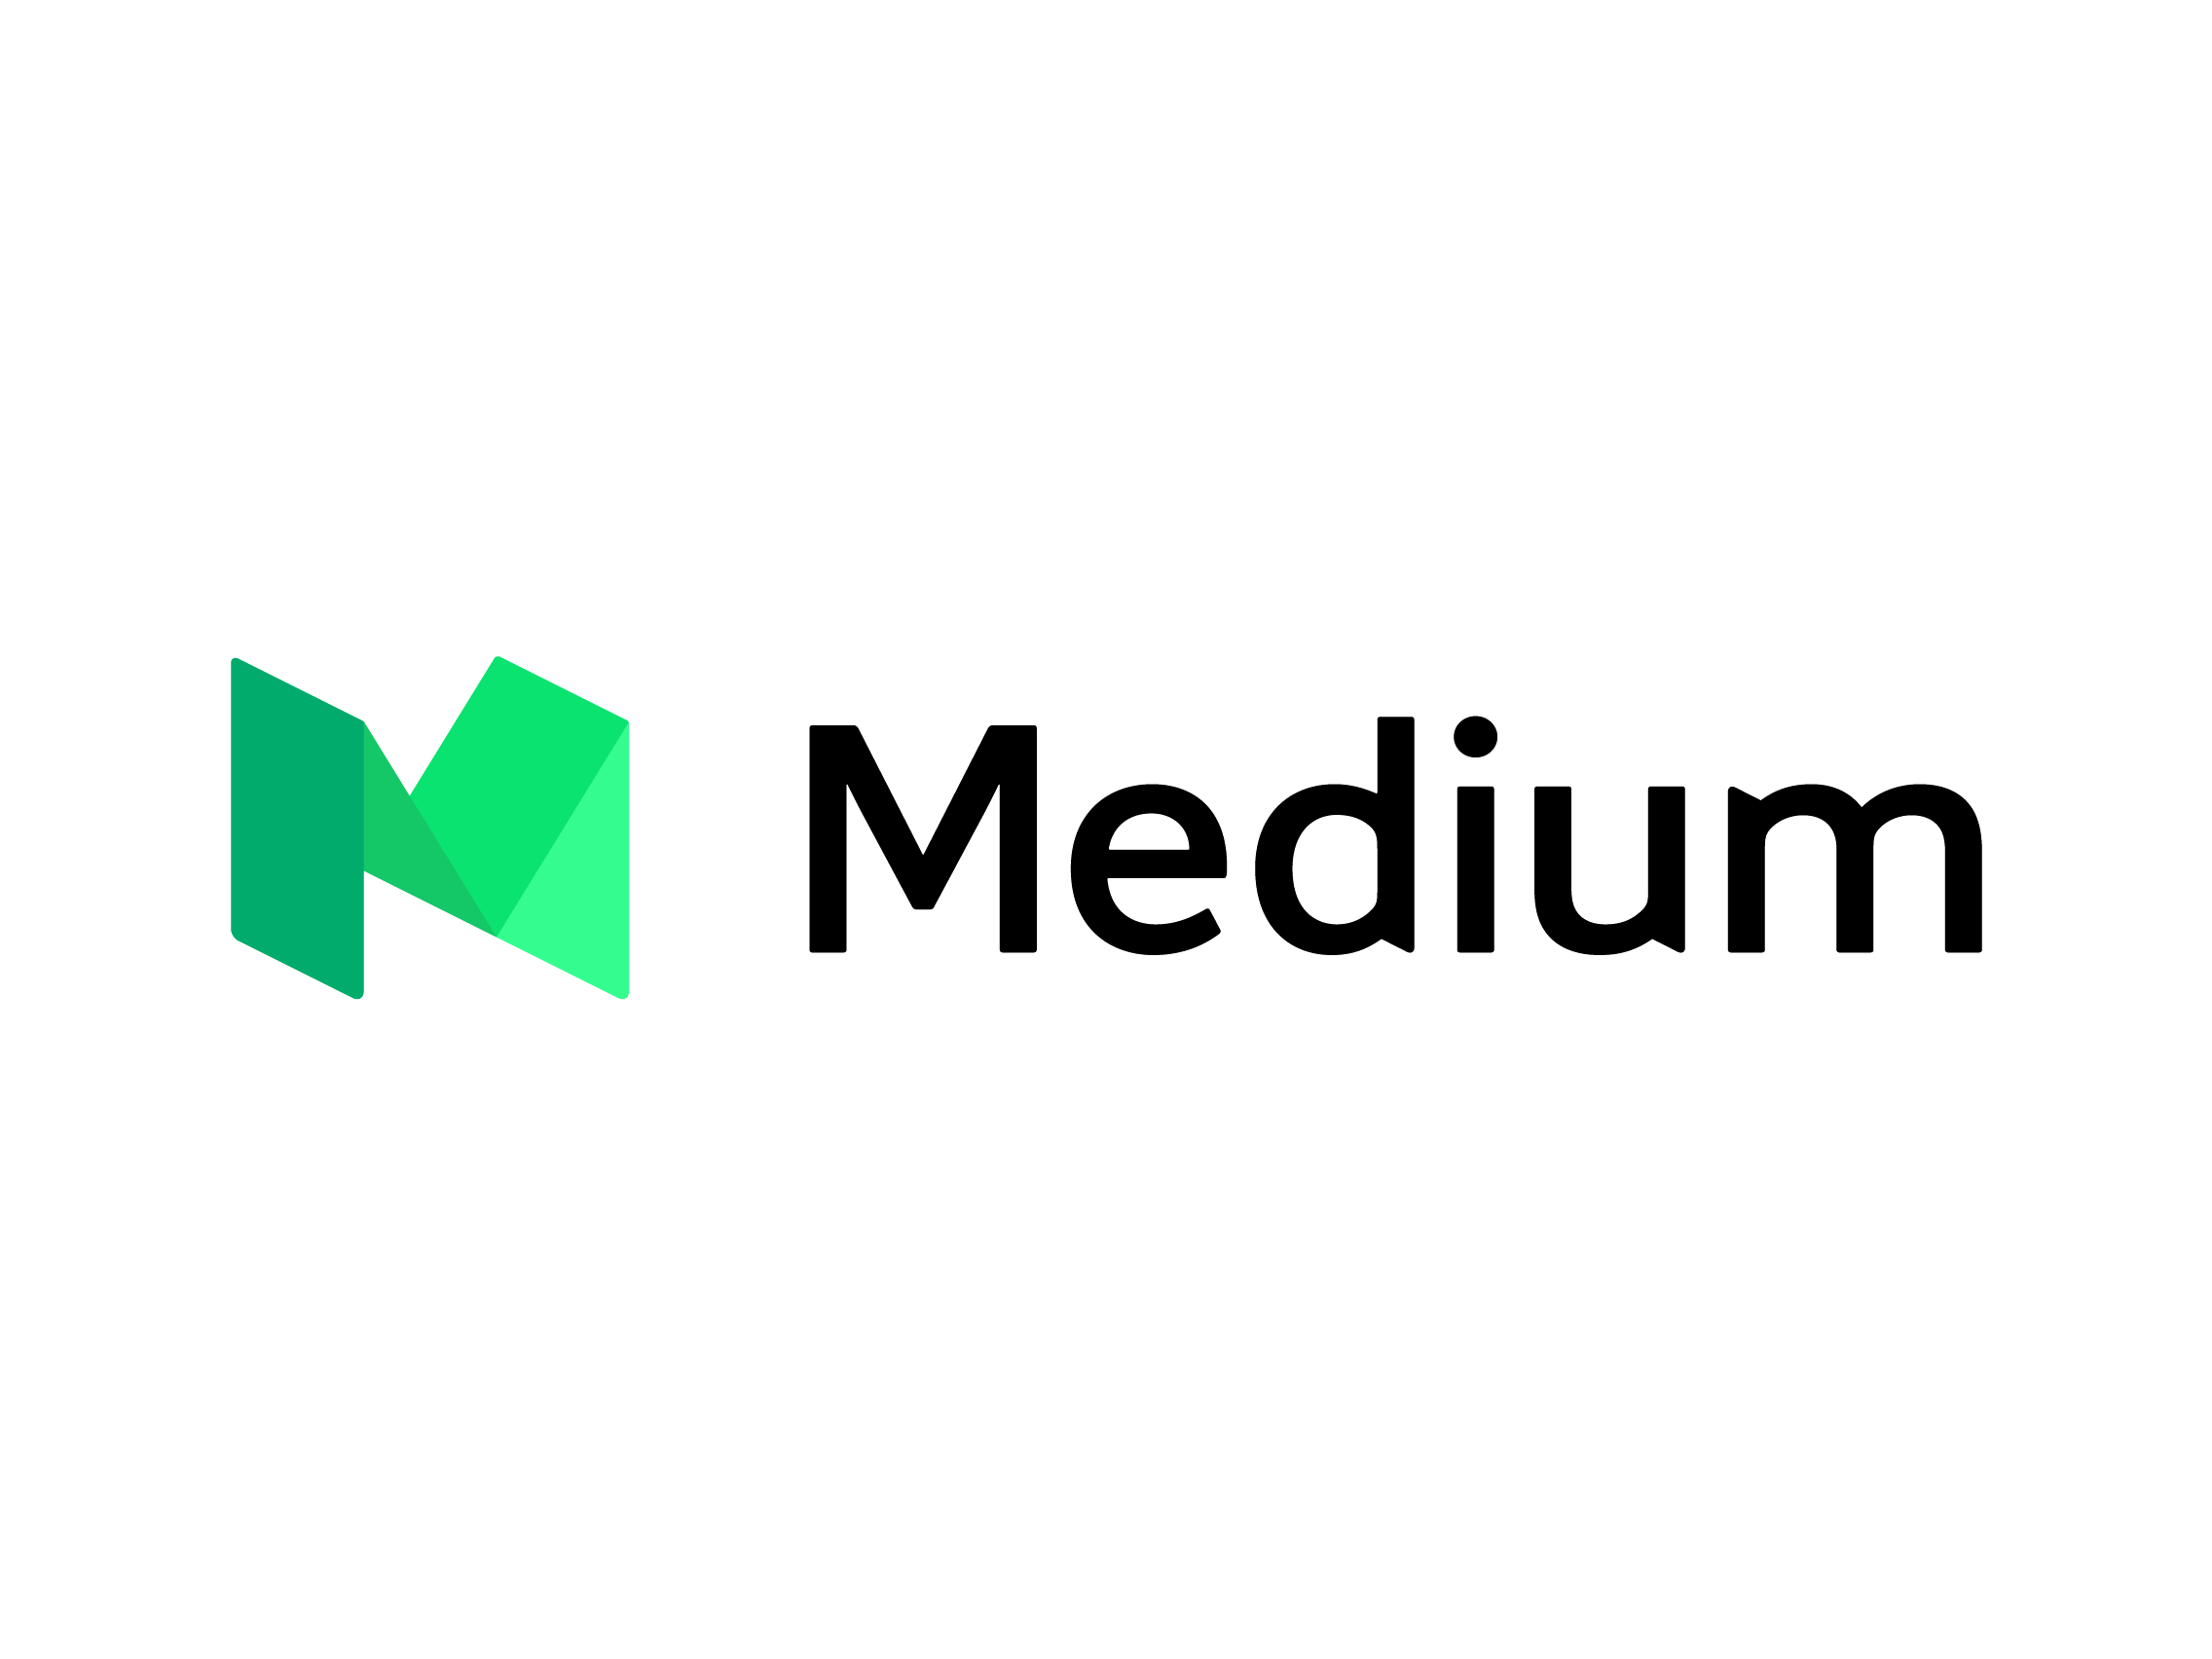](https://medium.com/@maladeep.upadhaya)__